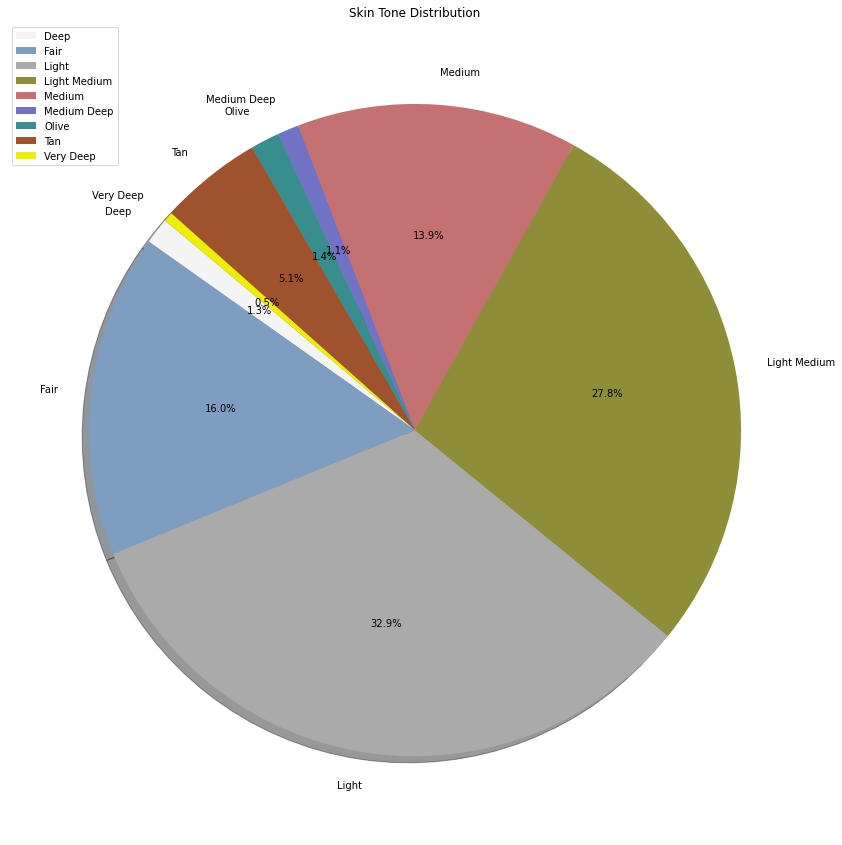

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    
import csv
import os
import nltk.corpus


# Read data
df=pd.read_csv(os.path.join('Data','Skin_wreviews_cleaned.csv'))


# Pie chart for skin tone 
colors=['#F4F4F4','#7D9EC0','#AAAAAA','#8E8E38','#C67171', '#7171C6','#388E8E','#A0522D','#EEEE00']
skintone_pie=df.groupby(['Skin_Tone']).size().plot.pie(colors=colors,autopct='%1.1f%%', shadow=True, startangle=140,figsize=(15,15))
plt.title("Skin Tone Distribution")
plt.ylabel(None)
plt.legend()
plt.show() 


# 90.6 % of customer has Fair/Light/Light Medium/Medium skin tone. 
# People with fairer skin tone whose skin contains less melanin, are at greater risk for sun damage, so it seems like they purchase more sunscreen.



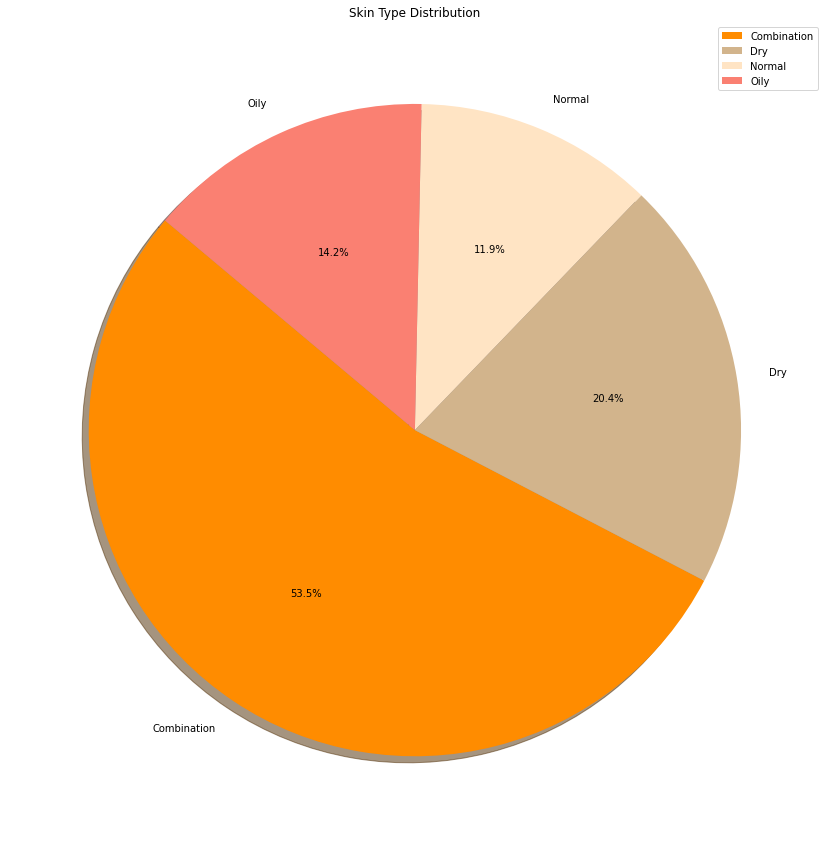

In [2]:

# Pie chart for skin type
colors=['darkorange','tan','bisque','salmon']
skintone_pie=df.groupby(['Skin_Type']).size().plot.pie(colors=colors,autopct='%1.1f%%', shadow=True, startangle=140,figsize=(15,15))
plt.title("Skin Type Distribution")
plt.ylabel(None)
plt.legend()
plt.show() 


# Over 50% of customer has Combination skin type. Next largest is Dry, and Oily.



In [3]:
# Categorize skin color into two types - Brighter(Fair,Light, Light Medium, Medium) and Deeper(Olive, Medium Deep, Tan, Very Deep) and analyze comments according to each type to determine the value of the consumer
# Using NLTK to find word frequency, also removing stop words

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

fd1 = FreqDist()

Group1_df= df[df['Skin_Tone'].str.contains("Fair|Light|Light Medium|Medium")].iloc[:, 1:]
Group1_df=Group1_df.reset_index()[['Product_ID','Comment','Skin_Tone']]
Group1_comment = list(Group1_df['Comment'])

stopwords = nltk.corpus.stopwords.words("english")

for sentence1 in Group1_comment:
    for words1 in (nltk.word_tokenize(sentence1)):
        if words1 not in stopwords:
        	fd1[words1] += 1

fd1.most_common(30)


[('skin', 3189),
 ('sunscreen', 2520),
 ('white', 1309),
 ('like', 1212),
 ('cast', 1182),
 ('really', 912),
 ('one', 893),
 ('love', 803),
 ('good', 722),
 ('use', 687),
 ('product', 683),
 ('great', 666),
 ('light', 658),
 ('oily', 657),
 ('face', 588),
 ('well', 587),
 ('nice', 566),
 ('also', 565),
 ('leave', 549),
 ('dry', 507),
 ('spf', 506),
 ('would', 475),
 ('makeup', 469),
 ('leaves', 462),
 ('feels', 444),
 ('sunscreens', 439),
 ('feel', 427),
 ('greasy', 427),
 ('texture', 420),
 ('sun', 384)]

In [4]:

fd2 = FreqDist()

Group2_df= df[df['Skin_Tone'].str.contains("Olive|Medium Deep|Deep|Tan|Very Deep")].iloc[:, 1:]
Group2_df=Group2_df.reset_index()[['Product_ID','Comment','Skin_Tone']]
Group2_comment = list(Group2_df['Comment'])

stopwords = nltk.corpus.stopwords.words("english")

for sentence2 in Group2_comment:
    for words2 in (nltk.word_tokenize(sentence2)):
        if words2 not in stopwords:
        	fd2[words2] += 1

fd2.most_common(30)


[('skin', 401),
 ('sunscreen', 308),
 ('white', 200),
 ('cast', 196),
 ('like', 158),
 ('one', 109),
 ('oily', 98),
 ('really', 94),
 ('leave', 90),
 ('love', 83),
 ('face', 82),
 ('product', 77),
 ('good', 76),
 ('sunscreens', 70),
 ('also', 69),
 ('great', 66),
 ('smell', 62),
 ('use', 60),
 ('feel', 57),
 ('well', 56),
 ('would', 55),
 ('light', 55),
 ('leaves', 52),
 ('nice', 51),
 ('using', 50),
 ('day', 50),
 ('recommend', 47),
 ('finish', 47),
 ('even', 47),
 ('dry', 46)]